In [10]:
#importing
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [11]:
#loading data
df_numeric = pd.read_csv('df_numeric.csv')

In [12]:
df_numeric.head(5)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,MoSold,YrSold,SalePrice,GarageYrBlt_missing_ind,LotFrontage_missing_ind,MasVnrArea_missing_ind,1stFlrSF_log,1stFlr_2ndFlr_SF,OverallGrade,SimplGarageQual
0,60,65.0,8450,2,4,4,3,7,5,2003,...,2,2008,208500,0,0,0,6.752270,1710,35,1
1,20,80.0,9600,2,4,4,3,6,8,1976,...,5,2007,181500,0,0,0,7.140453,1262,48,1
2,60,68.0,11250,2,3,4,3,7,5,2001,...,9,2008,223500,0,0,0,6.824374,1786,35,1
3,70,60.0,9550,2,3,4,3,7,5,1915,...,2,2006,140000,0,0,0,6.867974,1717,35,1
4,60,84.0,14260,2,3,4,3,8,5,2000,...,12,2008,250000,0,0,0,7.043160,2198,40,1


In [13]:
print(f"there are {df_numeric.shape[1]} features and {df_numeric.shape[0]} observations in dataset.")

there are 60 features and 1458 observations in dataset.


### Steps
1. Use features selections techniques significant features(above corr threshold) in our dataset
2. develop Model with significant features
3. add one by one other non-significant features to our Model to see how R-squared and adjust R-squared change

In [15]:
# removes all features whose variance doesn’t meet some threshold. 
#By default, it removes all zero-variance features, 
#i.e. features that have the same value in all samples.
vt = VarianceThreshold(0.25)
df_transformed = vt.fit_transform(df_numeric)

In [16]:
df_transformed

array([[6.00000e+01, 6.50000e+01, 8.45000e+03, ..., 2.08500e+05,
        1.71000e+03, 3.50000e+01],
       [2.00000e+01, 8.00000e+01, 9.60000e+03, ..., 1.81500e+05,
        1.26200e+03, 4.80000e+01],
       [6.00000e+01, 6.80000e+01, 1.12500e+04, ..., 2.23500e+05,
        1.78600e+03, 3.50000e+01],
       ...,
       [7.00000e+01, 6.60000e+01, 9.04200e+03, ..., 2.66500e+05,
        2.34000e+03, 6.30000e+01],
       [2.00000e+01, 6.80000e+01, 9.71700e+03, ..., 1.42125e+05,
        1.07800e+03, 3.00000e+01],
       [2.00000e+01, 7.50000e+01, 9.93700e+03, ..., 1.47500e+05,
        1.25600e+03, 3.00000e+01]])

In [17]:
#return True or False coresponding to variance threshold drop off columns above
#False means that feature dropped from dataset
vt.get_support()

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False])

In [24]:
#get all features has variance higher than threshold
selected_columns = df_numeric.columns[vt.get_support()]
###
df_variance = pd.DataFrame(df_transformed, columns = selected_columns)

In [25]:
df_variance.head(5)

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1stFlr_2ndFlr_SF,OverallGrade
0,60.0,65.0,8450.0,4.0,7.0,5.0,2003.0,2003.0,196.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,1710.0,35.0
1,20.0,80.0,9600.0,4.0,6.0,8.0,1976.0,1976.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,1262.0,48.0
2,60.0,68.0,11250.0,3.0,7.0,5.0,2001.0,2002.0,162.0,4.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,1786.0,35.0
3,70.0,60.0,9550.0,3.0,7.0,5.0,1915.0,1970.0,0.0,3.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,1717.0,35.0
4,60.0,84.0,14260.0,3.0,8.0,5.0,2000.0,2000.0,350.0,4.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,2198.0,40.0


In [26]:
#get correlations between features
df_corr = df_transformed.corr().abs()

In [49]:
#plotting df_corr
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1stFlr_2ndFlr_SF,OverallGrade
MSSubClass,1.00,0.37,0.14,0.12,0.03,0.06,0.03,0.04,0.02,0.02,0.05,0.02,0.03,0.07,0.02,0.07,0.14,0.25,0.02,0.26,0.31,0.05,0.08,0.00,0.13,0.18,0.02,0.01,0.04,0.01,0.05,0.01,0.04,0.10,0.07,0.09,0.01,0.01,0.01,0.04,0.03,0.01,0.01,0.01,0.02,0.08,0.07,0.01
LotFrontage,0.37,1.00,0.28,0.17,0.22,0.05,0.11,0.08,0.15,0.15,0.13,0.05,0.07,0.13,0.02,0.05,0.13,0.30,0.08,0.37,0.06,0.04,0.32,0.07,0.18,0.04,0.25,0.16,0.31,0.02,0.22,0.10,0.28,0.30,0.11,0.11,0.07,0.11,0.01,0.07,0.04,0.10,0.00,0.02,0.01,0.35,0.32,0.14
LotArea,0.14,0.28,1.00,0.30,0.09,0.00,0.01,0.01,0.08,0.04,0.06,0.03,0.05,0.18,0.09,0.11,0.00,0.22,0.00,0.27,0.04,0.01,0.23,0.15,0.12,0.01,0.12,0.06,0.18,0.03,0.26,0.02,0.15,0.16,0.08,0.08,0.17,0.06,0.02,0.02,0.05,0.04,0.04,0.01,0.01,0.27,0.23,0.08
LotShape,0.12,0.17,0.30,1.00,0.19,0.03,0.23,0.17,0.08,0.18,0.21,0.11,0.11,0.13,0.06,0.06,0.01,0.17,0.12,0.17,0.08,0.01,0.19,0.06,0.18,0.11,0.06,0.15,0.13,0.02,0.19,0.20,0.19,0.16,0.11,0.10,0.16,0.08,0.09,0.03,0.07,0.01,0.03,0.03,0.04,0.27,0.19,0.13
OverallQual,0.03,0.22,0.09,0.19,1.00,0.09,0.57,0.55,0.40,0.72,0.63,0.27,0.23,0.22,0.04,0.06,0.31,0.54,0.46,0.47,0.29,0.03,0.59,0.10,0.55,0.27,0.10,0.67,0.42,0.15,0.39,0.57,0.60,0.56,0.29,0.29,0.24,0.30,0.11,0.03,0.07,0.04,0.03,0.07,0.03,0.80,0.60,0.72
OverallCond,0.06,0.05,0.00,0.03,0.09,1.00,0.38,0.07,0.12,0.14,0.16,0.13,0.01,0.04,0.10,0.04,0.14,0.17,0.01,0.14,0.03,0.03,0.08,0.05,0.19,0.06,0.01,0.03,0.06,0.12,0.02,0.24,0.19,0.15,0.02,0.02,0.00,0.03,0.07,0.03,0.05,0.00,0.07,0.00,0.04,0.08,0.08,0.61
YearBuilt,0.03,0.11,0.01,0.23,0.57,0.38,1.00,0.59,0.31,0.60,0.60,0.18,0.35,0.25,0.04,0.05,0.15,0.40,0.45,0.28,0.01,0.18,0.19,0.19,0.47,0.24,0.07,0.53,0.09,0.15,0.14,0.76,0.54,0.48,0.29,0.29,0.22,0.18,0.39,0.03,0.05,0.01,0.03,0.01,0.01,0.52,0.21,0.16
YearRemodAdd,0.04,0.08,0.01,0.17,0.55,0.07,0.59,1.00,0.17,0.59,0.51,0.19,0.22,0.12,0.04,0.07,0.18,0.29,0.55,0.24,0.14,0.06,0.29,0.12,0.44,0.18,0.04,0.62,0.19,0.07,0.11,0.56,0.42,0.37,0.15,0.14,0.20,0.22,0.19,0.05,0.04,0.00,0.01,0.02,0.04,0.51,0.30,0.46
MasVnrArea,0.02,0.15,0.08,0.08,0.40,0.12,0.31,0.17,1.00,0.34,0.27,0.07,0.18,0.24,0.04,0.07,0.11,0.34,0.15,0.32,0.17,0.07,0.37,0.07,0.27,0.19,0.10,0.27,0.27,0.08,0.24,0.27,0.36,0.36,0.13,0.13,0.16,0.10,0.11,0.02,0.06,0.02,0.03,0.01,0.01,0.48,0.38,0.22
ExterQual,0.02,0.15,0.04,0.18,0.72,0.14,0.60,0.59,0.34,1.00,0.56,0.19,0.22,0.18,0.06,0.08,0.29,0.47,0.52,0.39,0.17,0.06,0.43,0.12,0.48,0.19,0.02,0.71,0.29,0.09,0.24,0.57,0.53,0.49,0.22,0.21,0.21,0.28,0.15,0.04,0.01,0.01,0.04,0.04,0.01,0.69,0.44,0.46


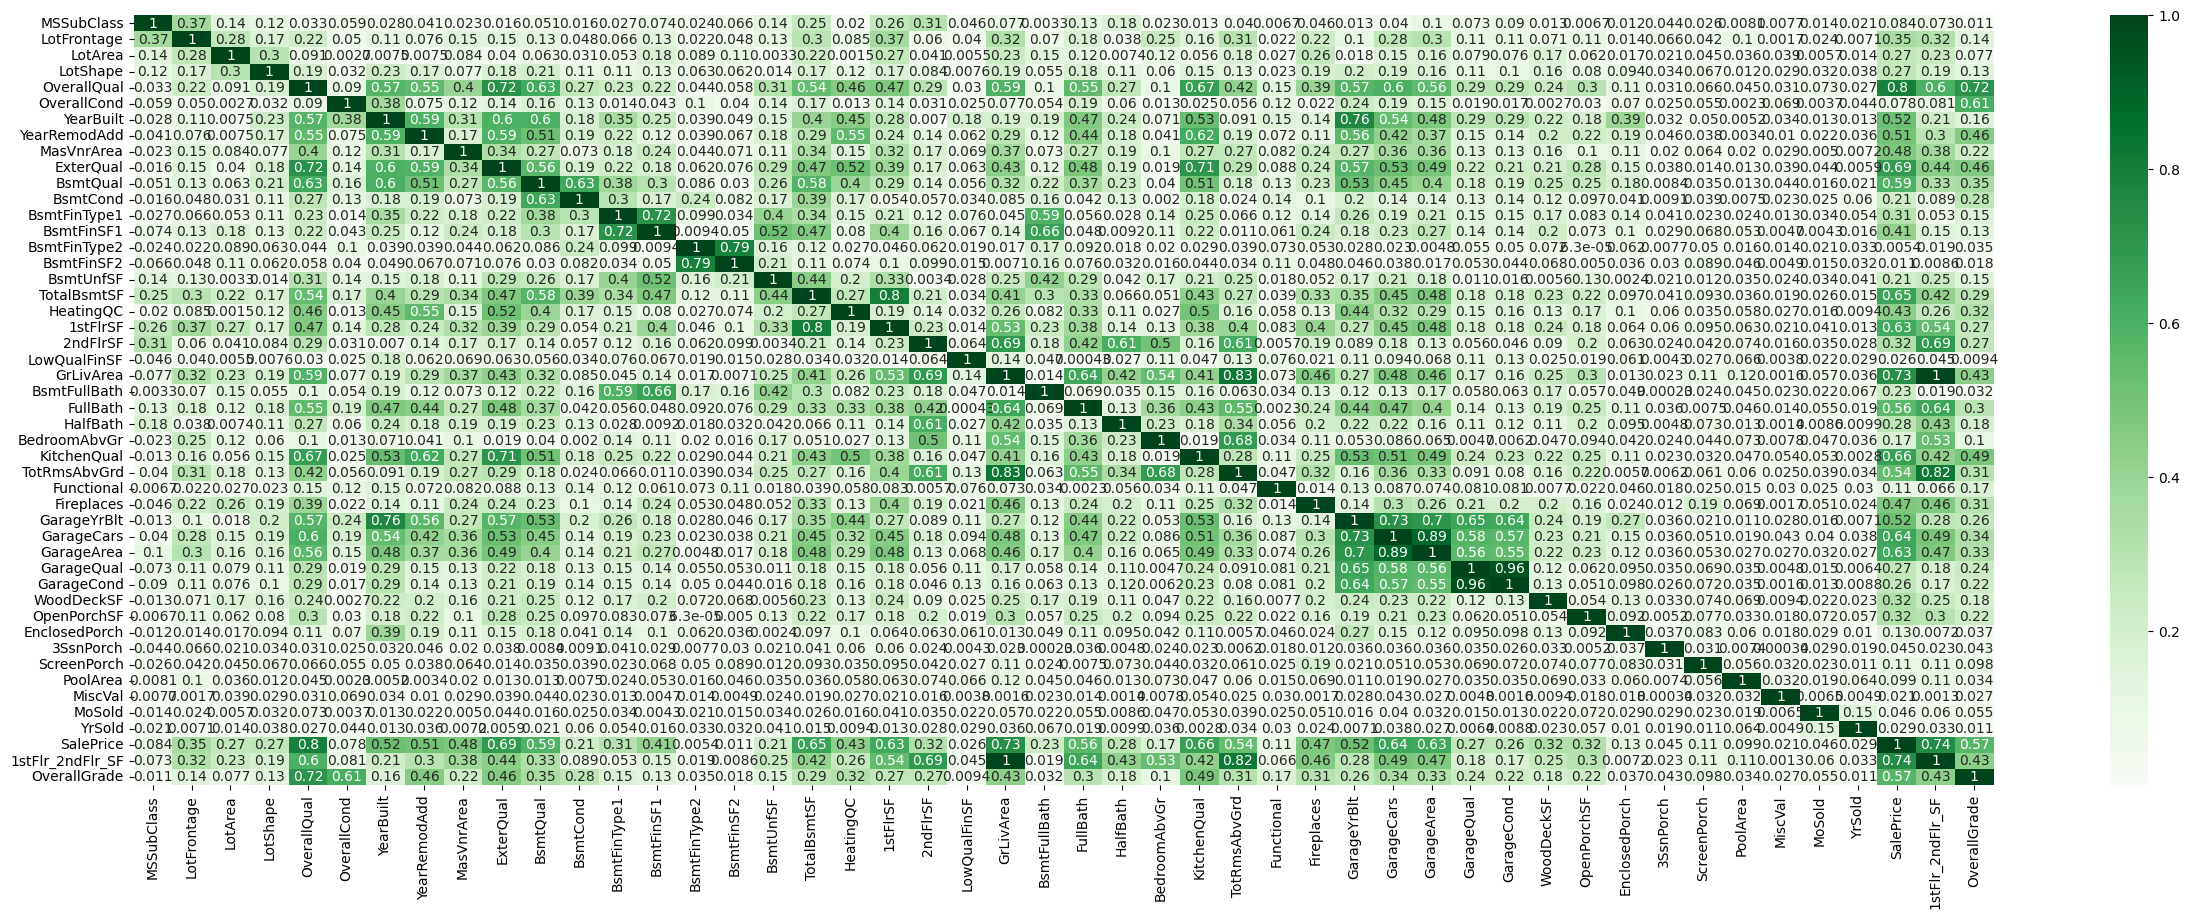

In [44]:
import seaborn as sns

plt.figure(figsize=(30,10))
sns.heatmap(df_corr, cmap="Greens",annot=True)
plt.show()

In [61]:
#more capable, interactive and easier to use alternatives.
import plotly.express as px

#####
fig = px.imshow(df_corr)
fig.show()